Creamos los arrays "x" e "y" utilizando numpy y random.uniform para crear el componente aleatorio en y

In [206]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar los datos
def generarDatosFC():
    x = np.arange(1, 61)  # 60 instantes de tiempo
    y = 0.7 * x + 60 + np.random.uniform(-5.9, 5.9, size=x.shape)
    return x, y

# Llamamos a la función para generar los datos
x, y = generarDatosFC()


Regresión lineal: Luego, vamos a adaptar x para que sea una lista de listas, como requiere LinearRegression de Scikit-learn, y luego entrenaremos el modelo y mostraremos los coeficientes.

In [207]:
# Adaptar los datos para LinearRegression
x_reshaped = [[i] for i in x]

# Crear el modelo de regresión lineal y entrenarlo
reg = LinearRegression()
reg.fit(x_reshaped, y)

# Mostrar los coeficientes y el intercepto
print(f"Coeficientes: {reg.coef_}")
print(f"Intercepto: {reg.intercept_}")

# Predecir los valores de y usando el modelo entrenado
y_lineal_result = reg.predict(x_reshaped)


Coeficientes: [0.70756183]
Intercepto: 59.52535837452215


Visualización: Finalmente, usamos matplotlib para mostrar los puntos generados y la línea de regresión.

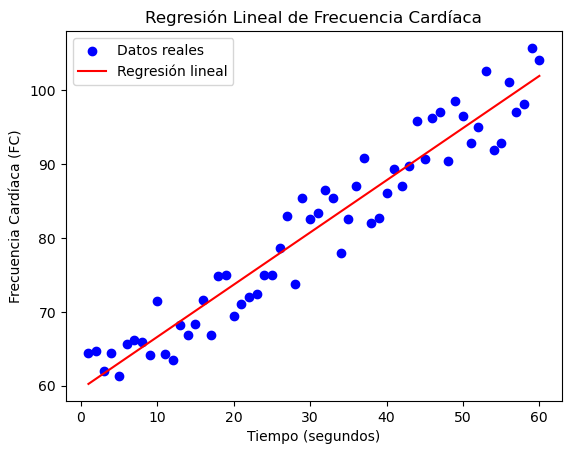

In [208]:
# Mostrar los resultados
plt.scatter(x, y, color='blue', label='Datos reales')  # Datos reales
plt.plot(x, y_lineal_result, color='red', label='Regresión lineal')  # Línea de regresión
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Frecuencia Cardíaca (FC)')
plt.legend()
plt.title('Regresión Lineal de Frecuencia Cardíaca')
plt.show()

In [209]:
# Evaluar el método predict con nuevos valores
test_values = np.array([[65], [70], [100]])  # Nuevos valores de entrada
predicted_values = reg.predict(test_values)
print(f"Las predicciones para valores {test_values.flatten()} son: {predicted_values}")  # Resultados de predicción

Las predicciones para valores [ 65  70 100] son: [105.5168776  109.05468677 130.2815418 ]


In [210]:
# Mas atributos de LinearRegression
print(f"Valores singulares de la matriz de entrada: {reg.singular_}")  # Valores singulares de la matriz de entrada
print(f"Sesgo del modelo (intercept_): {reg.intercept_}")  # Confirmación del sesgo (intercepto)
print(f"Tamaño de los datos de entrenamiento: {len(x_reshaped)}")  # Cantidad de muestras usadas
print(f"¿El modelo usa sesgo?: {reg.fit_intercept}")  # Aprendio bien


Valores singulares de la matriz de entrada: [134.14544346]
Sesgo del modelo (intercept_): 59.52535837452215
Tamaño de los datos de entrenamiento: 60
¿El modelo usa sesgo?: True


In [211]:
# PARTE B - REGRESIÓN LOGÍSTICA

# Primero, generaremos un dataset sintético que contenga 800 instancias (personas). Cada persona tendrá los siguientes atributos:

# - Presión arterial: Valores aleatorios entre 70 y 180.
# - Colesterol: Valores aleatorios entre 120 y 250.
# - Otro atributo: Un valor aleatorio inventado (por ejemplo, edad entre 18 y 80).


# Además, calcularemos la probabilidad de que una persona tenga problemas cardiovasculares en función de sus niveles de presión arterial y colesterol. 
# Luego, aplicaremos un umbral para determinar si la persona tiene riesgo cardiovascular (1) o no (0).


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. Generar datos sintéticos
np.random.seed(42)
n_samples = 800

# Presión arterial (entre 70 y 180)
presion_arterial = np.random.uniform(70, 180, n_samples)

# Colesterol (entre 120 y 250)
colesterol = np.random.uniform(120, 250, n_samples)

# Otro atributo (edad entre 18 y 80)
edad = np.random.uniform(18, 80, n_samples)

# 2. Calcular la probabilidad de riesgo cardiovascular
# La probabilidad aumenta con la presión arterial y el colesterol
probabilidad_riesgo = 1 / (1 + np.exp(-(0.1 * presion_arterial + 0.05 * colesterol - 20)))

# 3. Aplicar un umbral para determinar la clase (1: riesgo, 0: no riesgo)
umbral = 0.5
riesgo_cardiovascular = (probabilidad_riesgo >= umbral).astype(int)

# Combinar los datos en un array X
X = np.column_stack((presion_arterial, colesterol, edad))
y = riesgo_cardiovascular

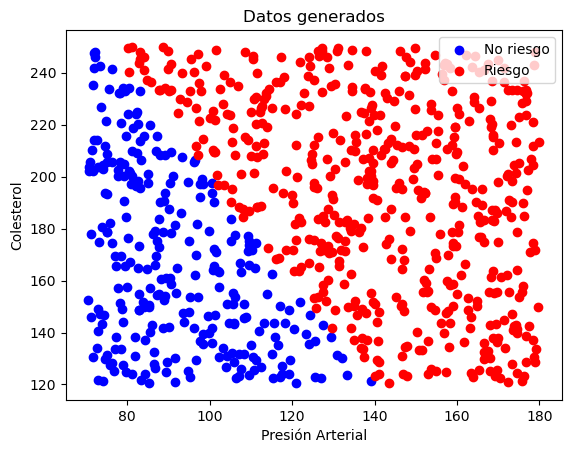

In [212]:
# 4. Visualizamos los datos

# Graficar los datos
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='No riesgo')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Riesgo')
plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')
plt.title('Datos generados')
plt.legend(loc='upper right')
plt.show()

Cada punto representa una persona,
visualiza los datos antes de aplicar un modelo de regresión logistica

In [213]:
# 5. Entrenamos un modelo de regresión logística

# Normalizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el modelo de regresión logística con datos normalizados
modelo = LogisticRegression(C=0.1, class_weight='balanced')
modelo.fit(X_scaled, y)

# Coeficientes del modelo
print("Coeficientes:", modelo.coef_)
print("Intercept:", modelo.intercept_)

Coeficientes: [[2.97873113 1.57055436 0.02757156]]
Intercept: [1.26281122]


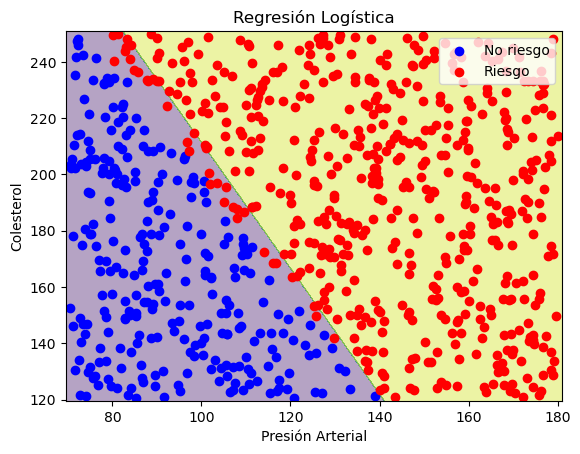

In [214]:
# 6. Visualizamos la curva de regresión logística

# Crear una malla para graficar la curva de regresión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecir la clase para cada punto en la malla
Z = modelo.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())]))
Z = Z.reshape(xx.shape)

# Graficar la curva de regresión
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='No riesgo')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Riesgo')
plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')
plt.title('Regresión Logística')
plt.legend(loc='upper right')
plt.show()

Esta gráfica representa el conjunto de entrenamiento de 800 instancias con la frontera de decisión de la regresión logística.
(Entrenamos el modelo y visualizamos cómo separa las clases en los datos de entrenamiento)

Es casi una línea recta diagonal, lo que indica que el modelo ha aprendido bien, aunque algunos puntos cerca de la frontera están mal clasificados

Algunos puntos rojos aparecen en la zona azul, lo que indica que hay casos cercanos a la frontera de decisión que pueden ser difíciles de clasificar, ciertos individuos tienen valores de presión arterial y colesterol cercanos al umbral de riesgo, lo que genera incertidumbre en la clasificación.

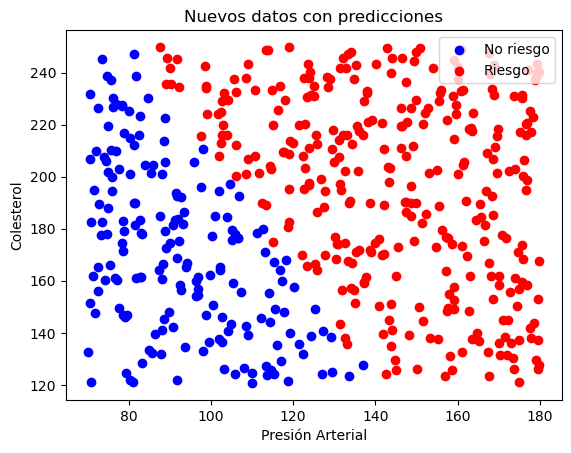

In [215]:
# 7. Generamos y evaluamos un nuevo conjunto de datos
np.random.seed(43)
# Generar un nuevo conjunto de datos
nuevo_X = np.column_stack((np.random.uniform(70, 180, 500), # presion arterial
                           np.random.uniform(120, 250, 500), # colesterol
                           np.random.uniform(18, 80, 500))) # edad

# Predecir las clases para el nuevo conjunto de datos
nuevo_y = modelo.predict(scaler.transform(nuevo_X))

# Graficar los nuevos datos con las predicciones
plt.scatter(nuevo_X[nuevo_y == 0, 0], nuevo_X[nuevo_y == 0, 1], color='blue', label='No riesgo')
plt.scatter(nuevo_X[nuevo_y == 1, 0], nuevo_X[nuevo_y == 1, 1], color='red', label='Riesgo')
plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')
plt.title('Nuevos datos con predicciones')
plt.legend(loc='upper right')
plt.show()

Los puntos azules (No riesgo) estan en la esquina inferior izquierda, donde la presión arterial y el colesterol son bajas.
Los puntos rojos (Riesgo) están en la esquina superior derecha, donde la presión arterial y el colesterol son altos.

Esta grafica representa 500 nuevas instancias y cómo fueron clasificadas por el modelo entrenado.
(Evaluamos el modelo en datos nuevos para verificar si sigue clasificando correctamente)

Se observa un patrón similar al conjunto original, lo que sugiere que el modelo está generalizando bien los nuevos datos.
La separación entre rojos y azules es igual que en la primera grafica.